In [1]:
# Bibliotecas necessárias para o experimento

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def S(Ut, Uf, X):
    W = np.dot(np.transpose(Uf), Ut)
    T = np.transpose(W)
    A = np.dot(np.transpose(Ut), np.transpose(X))
    C = np.dot(A, Uf)
    L = W - np.identity(3) - 1/2*(W - np.identity(3))**2
    S = 2*np.trace(np.dot((-np.dot(T, C) + 2*C),L))
    #S = 2*np.trace(np.dot((-1/2*np.dot(C, T) - 1/2*np.dot(T, C) + 2*C),L))
    return S

In [3]:
def field(Ut, Uf, a, h, A, B):
    SA = S(Ut, Uf, A)
    SB = S(Ut, Uf, B)
    f = -a*SA-h*(SB/SA)
    return f

In [4]:
def lind(u, Ut, Uf, t, lbda):
    Ax = [[0, 0, 0],[0, 0, -1], [0, 1, 0]]
    Ay = [[0, 0, 1],[0, 0, 0], [-1, 0, 0]]
    Az = [[0, -1, 0],[1, 0, 0], [0, 0, 0]]
    B = [[-0.001*lbda, 0, 0],[0, -0.001*lbda, 0], [0, 0, -1.001*lbda]] # Amplitude Damping
    #B = [[-1.01*lbda, 0, 0],[0, -1.01*lbda, 0], [0, 0, -0.01*lbda]] # Phase Damping
    if t == 0:
        fx=10.28
        fy=10.73
        fz=40
        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
    else:
        fx=field(Ut, Uf, u[0], u[3], Ax, B)
        fy=field(Ut, Uf, u[1], u[4], Ay, B)
        fz=field(Ut, Uf, u[2], u[5], Az, B)
        P=400

        if abs(fx) > P:
            if fx < 0:
                fx = -P
            else:
                fx = P
        if abs(fy) > P:
            if fy < 0:
                fy = -P
            else:
                fy = P
        if abs(fz) > P:
            if fz < 0:
                fz = -P
            else:
                fz = P

        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
        	
    return fx,fy,fz,F

In [5]:
def rungeKutta(u, Ut, Uf, h, t, lbda):
    fx,fy,fz,k1 = lind(u, Ut, Uf, t, lbda)
    k1 = np.dot(k1,Ut)
    fx,fy,fz,k2 = lind(u, (Ut+h/2*k1), Uf, t+h/2, lbda)
    k2 = np.dot(k2,(Ut+h/2*k1))
    fx,fy,fz,k3 = lind(u, (Ut+h/2*k2), Uf, t+h/2, lbda)
    k3 = np.dot(k3,(Ut+h/2*k2))
    fx,fy,fz,k4 = lind(u, (Ut+h*k3), Uf, t+h, lbda)
    k4 = np.dot(k4,(Ut+h*k3))
    a = fx;
    b = fy;
    c = fz;
    result = Ut+(h/6)*(k1+2*k2+2*k3+k4);
    return a,b,c,result

In [6]:
def leis_controle(fx, fy, fz, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    plt.ylabel("Valores das leis de controle") 
    plt.xlabel('Tempo (u. a.)') 
    plt.plot(ts, fx, color='g', marker='o', linewidth=1, markersize=1, label="$f_x(t)$")
    plt.plot(ts, fy, color='b', marker='_', linewidth=1, markersize=1, label="$f_y(t)$")
    plt.plot(ts, fz, color='r', marker='.', linewidth=1, markersize=1, label="$f_z(t)$")
    plt.legend(loc="upper right")
    plt.title(fr"Leis de controle para $\gamma = {lbda}$")
    plt.show()

In [7]:
def fidelidade(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de fidelidade") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Fidelidade com $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.indicate_inset_zoom(axins)
    
    plt.show()

In [8]:
def distance(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de distância") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Distância entre os operadores de evolução com $\gamma = {lbda}$")

    #x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    #axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    #axins.set_xlim(0.009, 0.020)
    #axins.set_ylim(0.98, 1)

    #axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    #ax.indicate_inset_zoom(axins)
    
    plt.show()

In [9]:
def densidade(rho, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel('Valores da matriz de densidade') 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    ax.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    ax.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    ax.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Evolução da matriz de densidade $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(max(abs(rho[0])), max(abs(rho[1])), max(abs(rho[2])), max(abs(rho[3])))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    axins.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    axins.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    axins.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")

    ax.indicate_inset_zoom(axins)
    
    plt.show()

############ Informações finais do experimento ############

O rf desejado é:
 [[-1]
 [ 0]
 [ 0]]
O rho desejado é: [[np.float64(0.5), np.complex128(-0.5+0j)], [np.complex128(-0.5+0j), np.float64(0.5)]]
O vetor de Bloch encontrado é:
 [[-1.00152951]
 [ 0.00137168]
 [-0.00767834]]
O rho alcançado foi:
 [[np.float64(0.49616083147292356), np.complex128(-0.5007647571923242-0.000685839696622035j)], [np.complex128(-0.5007647571923242+0.000685839696622035j), np.float64(0.5038391685270764)]]
A fidelidade do experimento é de: (0.9999926302567284+0j)
A fidelidade do experimento é de (fórmula dos autores do artigo): 0.9995892908642782
O vetor U alcançado foi:
 [[-1.00152951 -0.00140142  0.00969331]
 [ 0.00137168  0.99901473  0.00173632]
 [-0.00767834 -0.00171152 -0.99881872]]
A distância encontrada, ao final do experimento foi: 0.0001674123423934884

############ Informações gráficas obtidas com o experimento ############



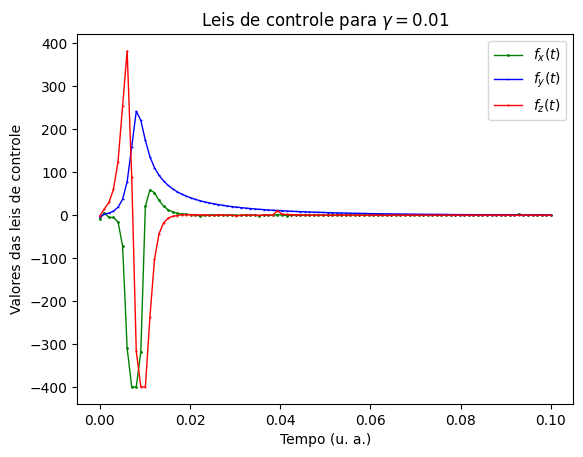

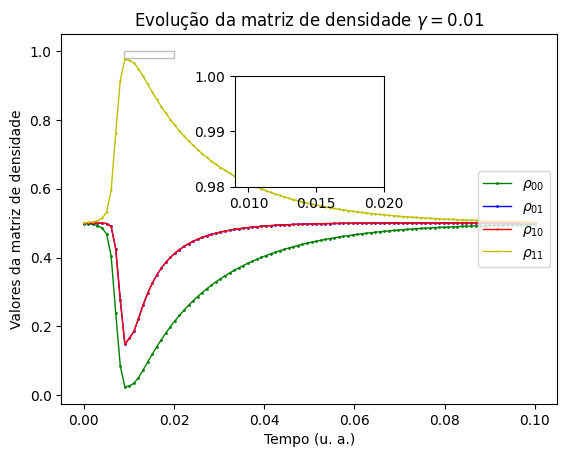

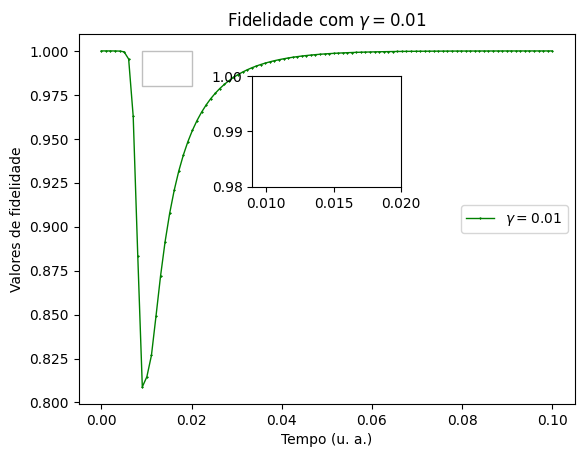

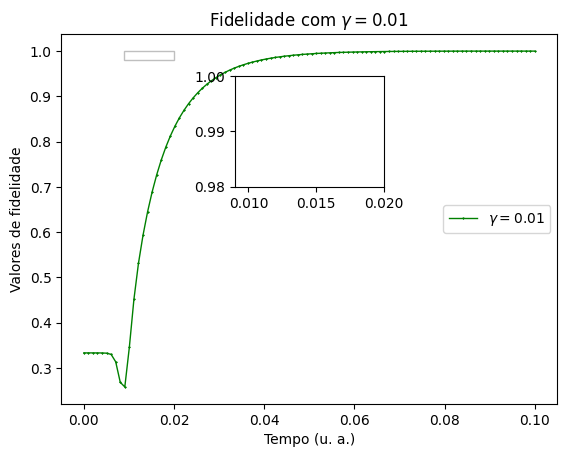

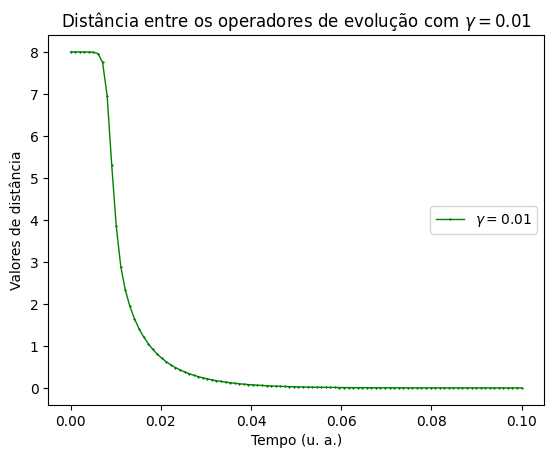

In [10]:
u = [102, 13, 84, 0.35, 0.31, 0.34]

Ut = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Uf = [[-1, 0, 0], [0, 1, 0], [0, 0, -1]]

print(f"############ Informações finais do experimento ############\n")

r0 = [[1], [0], [0]]
rf = np.dot(Uf, r0)
print(f'O rf desejado é:\n {rf}')
pf = [[1/2*(1+rf[2][0]), 1/2*(rf[0][0]-1j*rf[1][0])], [1/2*(rf[0][0]+1j*rf[1][0]), 1/2*(1-rf[2][0])]]
print(f'O rho desejado é: {pf}')

h=0.001
t=0
i=0
lbda=0.01
distance_vector = []
fx_vector = []
fy_vector = []
fz_vector = []
rho_vector = np.zeros((4,100),dtype=np.complex128)
fid_vector = []
fid_autores = []
   
while t < 100:
    a,b,c,Ut = rungeKutta(u, Ut, Uf, h, t, lbda)
    D = np.linalg.norm(Ut-Uf)**2
    distance_vector.append(D)
    fx_vector.append(a)
    fy_vector.append(b)
    fz_vector.append(c)
    rt = np.dot(Ut, r0)
    pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
    rho_vector[0][t] = pt[0][0]
    rho_vector[1][t] = pt[0][1]
    rho_vector[2][t] = pt[1][0]
    rho_vector[3][t] = pt[1][1]
    fid_vector.append(np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt))))
    fid_autores.append((np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1)))
    t += 1

rt = np.dot(Ut, r0)
print(f'O vetor de Bloch encontrado é:\n {rt}')
pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
print(f'O rho alcançado foi:\n {pt}')
print(f'A fidelidade do experimento é de: {np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt)))}')
print(f'A fidelidade do experimento é de (fórmula dos autores do artigo): {(np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1))}')
print(f'O vetor U alcançado foi:\n {Ut}')
print(f'A distância encontrada, ao final do experimento foi: {D}')

print(f"\n############ Informações gráficas obtidas com o experimento ############\n")

leis_controle(fx_vector,fy_vector,fz_vector,t,lbda)
densidade(rho_vector,t,lbda)
fidelidade(fid_vector,t,lbda)
fidelidade(fid_autores,t,lbda)
distance(distance_vector,t,lbda)

In [11]:
print(f"\n############ Informações provenientes de análises gráficas ############\n")

time = 0
for i in range(len(rho_vector[0])):
    if rho_vector[0][i] == max(abs(rho_vector[0])):
        time = i
        break
print(fr"O maior valor obtido para ρ, na primeira posição da matriz, foi {max(abs(rho_vector[0]))} para o tempo de {time/1000}, com fidelidade de {np.abs(fid_vector[time])} e de acordo com a fórmula dos autores, com fidelidade de {np.abs(fid_autores[time])}")


############ Informações provenientes de análises gráficas ############

O maior valor obtido para ρ, na primeira posição da matriz, foi 0.49883624952943156 para o tempo de 0.0, com fidelidade de 0.9999993228412749 e de acordo com a fórmula dos autores, com fidelidade de 0.3333151045563333


In [12]:
print(fid_autores)

[np.float64(0.3333151045563333), np.float64(0.33331031545622103), np.float64(0.3333001622609268), np.float64(0.33327166761831), np.float64(0.33316175601509385), np.float64(0.3326926763400376), np.float64(0.3299976815908833), np.float64(0.31359759656483144), np.float64(0.26841390951120986), np.float64(0.2581939717432464), np.float64(0.34627176878100707), np.float64(0.45164516398094984), np.float64(0.5312764991609291), np.float64(0.5933556569792594), np.float64(0.6448445164938614), np.float64(0.6887327634472019), np.float64(0.726522414899574), np.float64(0.7592082622295001), np.float64(0.787564394608261), np.float64(0.8122625341221976), np.float64(0.8337744091344911), np.float64(0.8525793230866464), np.float64(0.8690587335440476), np.float64(0.883537857245499), np.float64(0.8962831776218861), np.float64(0.9075274055401478), np.float64(0.9174645316178016), np.float64(0.9262633046872256), np.float64(0.9340665353546377), np.float64(0.9409965190788241), np.float64(0.9471596081303765), np.flo

In [13]:
print(fid_vector)

[np.complex128(0.9999993228412749+0j), np.complex128(0.9999982652278407+0j), np.complex128(0.9999938104861198+0j), np.complex128(0.9999756617139781+0j), np.complex128(0.9999015872992567+0j), np.complex128(0.9994973771918106+0j), np.complex128(0.9953681691724479+0j), np.complex128(0.9627193847616519+0j), np.complex128(0.8836023335759211+0j), np.complex128(0.8088578391589707+0j), np.complex128(0.8146549793270192+0j), np.complex128(0.8267515082334208+0j), np.complex128(0.849025889109687+0j), np.complex128(0.8718818703368441+0j), np.complex128(0.8914530332643193+0j), np.complex128(0.9075376584073728+0j), np.complex128(0.9207247411922351+0j), np.complex128(0.9316186001253451+0j), np.complex128(0.9407026326831132+0j), np.complex128(0.9483473749791957+0j), np.complex128(0.9548274905632169+0j), np.complex128(0.9603595785441974+0j), np.complex128(0.9651108188096302+0j), np.complex128(0.9692124578813698+0j), np.complex128(0.972770758931381+0j), np.complex128(0.9758698318832008+0j), np.complex128

In [14]:
print(distance_vector)

[np.float64(7.9997812541840885), np.float64(7.999723783780813), np.float64(7.9996019394221065), np.float64(7.999259952843951), np.float64(7.9979404124238815), np.float64(7.992301528019903), np.float64(7.959640245796748), np.float64(7.7486830306103185), np.float64(6.954317780943526), np.float64(5.313854657357107), np.float64(3.84923950471346), np.float64(2.887844762215656), np.float64(2.3253437120303544), np.float64(1.94033392233193), np.float64(1.6466154072999113), np.float64(1.4110273445490797), np.float64(1.2174500054479735), np.float64(1.0561187150681939), np.float64(0.9203018639218735), np.float64(0.8050442000326299), np.float64(0.7065689958678179), np.float64(0.6219582335094297), np.float64(0.5488871604574938), np.float64(0.48550851524380667), np.float64(0.4302892309815512), np.float64(0.3820287447874763), np.float64(0.33970926726068895), np.float64(0.3025039765778518), np.float64(0.26970395321414137), np.float64(0.24072515774071243), np.float64(0.21507318796152283), np.float64(0.

In [15]:
print(min(distance_vector))

0.0001674123423934884


In [16]:
print(max(fid_autores))

0.9995968034623286
